# Higgs Boson Challenge: Cross validation

In this notebook, we perform cross validation to find the best parameters for
optimization functions.

- The parameters found are saved in the `parameters.json` file.
- The figures are saved in the `figs` folder.

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Import methods from scripts/
from path import (add_src_to_path, load_json_parameters,
                  update_json_parameters, DATA_TRAIN_PATH, FIGS_DIR)

# Add src/ to path to import functions
add_src_to_path()

# Import functions from src/
from clean_data import clean_data_by_jet
from cross_validation import get_best_param
from csv_utils import load_csv_data
from implementations import least_squares, ridge_regression
from print_utils import (get_subset_label, print_shapes, print_shapes_by_jet,
                         print_subset_label)
from split_data import split_by_jet, NB_SUBSETS

In [3]:
# Load data
y, x, ids = load_csv_data(DATA_TRAIN_PATH)
print_shapes(y, x)

Shape of y: (250000,)
Shape of x: (250000, 30)


In [4]:
# Split train data by jet
y_by_jet, x_by_jet, _ = split_by_jet(y, x)
print_shapes_by_jet(y_by_jet, x_by_jet)

JET = 0:
Shape of y: (99913,)
Shape of x: (99913, 29)
JET = 1:
Shape of y: (77544,)
Shape of x: (77544, 29)
JET >= 2:
Shape of y: (72543,)
Shape of x: (72543, 29)


In [5]:
# Clean train data by jet
clean_data_by_jet(y_by_jet, x_by_jet, std=True)
print_shapes_by_jet(y_by_jet, x_by_jet)

JET = 0:
Shape of y: (99913,)
Shape of x: (99913, 18)
JET = 1:
Shape of y: (77544,)
Shape of x: (77544, 22)
JET >= 2:
Shape of y: (72543,)
Shape of x: (72543, 29)


## Ridge regression

JET = 0:
[Start] Cross validation
[Results]
- Best degree: 11
- Best accuracy: 0.843
[End] Cross validation (time: 53.40 s.)
JET = 1:
[Start] Cross validation
[Results]
- Best degree: 12
- Best accuracy: 0.805
[End] Cross validation (time: 51.04 s.)
JET >= 2:
[Start] Cross validation
[Results]
- Best degree: 10
- Best accuracy: 0.830
[End] Cross validation (time: 61.21 s.)
Best degrees: [11, 12, 10]


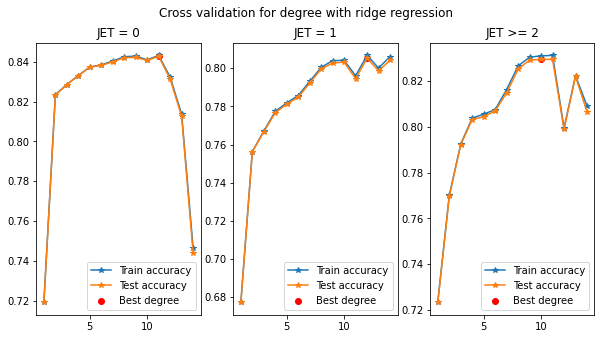

In [6]:
# Cross validation for degree by jet
lambda_ = 1e-3
degrees = list(range(1, 15))
best_degrees = list()

plt.figure(figsize=(10, 5))

for i in range(NB_SUBSETS):
    print_subset_label(i)
    plt.subplot(1, 3, i + 1)
    degree = get_best_param(
        y_by_jet[i], x_by_jet[i], optimizer=ridge_regression,
        param_name='degree', param_list=degrees, k_fold=10, verbose=1,
        plot=True, title=get_subset_label(i), lambda_=lambda_)
    best_degrees.append(degree)

plt.suptitle('Cross validation for degree with ridge regression')

# Save figure
path = os.path.join(FIGS_DIR, 'cross_validation_degree_ridge_regression.pdf')
plt.savefig(path)

print('Best degrees:', best_degrees)

In [7]:
# Save best degrees
params = load_json_parameters()
params['ridge_regression']['lambda_'] = lambda_
params['ridge_regression']['degree'] = best_degrees
update_json_parameters(params)

## Least squares

JET = 0:
[Start] Cross validation
[Results]
- Best degree: 9
- Best accuracy: 0.843
[End] Cross validation (time: 59.78 s.)
JET = 1:
[Start] Cross validation
[Results]
- Best degree: 11
- Best accuracy: 0.804
[End] Cross validation (time: 57.60 s.)
JET >= 2:
[Start] Cross validation
[Results]
- Best degree: 11
- Best accuracy: 0.830
[End] Cross validation (time: 71.35 s.)
Best degrees: [9, 11, 11]


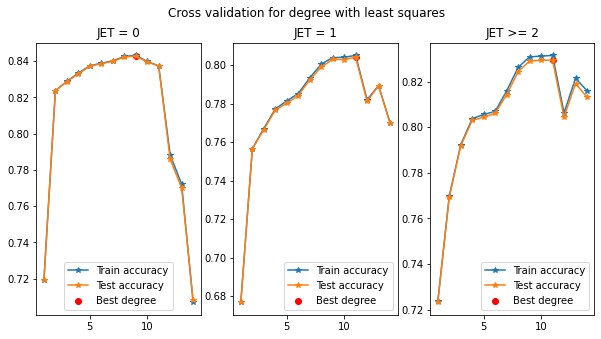

In [6]:
# Cross validation for degree by jet
degrees = list(range(1, 15))
best_degrees = list()

plt.figure(figsize=(10, 5))

for i in range(NB_SUBSETS):
    print_subset_label(i)
    plt.subplot(1, 3, i + 1)
    degree = get_best_param(
        y_by_jet[i], x_by_jet[i], optimizer=least_squares,
        param_name='degree', param_list=degrees, k_fold=10, verbose=1,
        plot=True, title=get_subset_label(i))
    best_degrees.append(degree)

plt.suptitle('Cross validation for degree with least squares')

# Save figure
path = os.path.join(FIGS_DIR, 'cross_validation_degree_least_squares.pdf')
plt.savefig(path)

print('Best degrees:', best_degrees)

In [7]:
# Save best degrees
params = load_json_parameters()
params['least_squares']['degree'] = best_degrees
update_json_parameters(params)